# <h><b><center>⭐️⭐️Folium - Distance Calculation between two places⭐️⭐️</center></b></h>


## **Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in a Leaflet map via folium.**

<center>
    <img src="https://cdn.wpluscoding.com/ProjectFiles/c9347e02-8ff2-45c8-a5b5-67528e02b7b2/folium.png" alt="centered image" />
</center>


**Already I published geopandas, if you interested go and refer [link](https://www.kaggle.com/code/venkatkumar001/geographical-visual-geopandas-gmplot)**

# **Install the library**

!pip install folium

In [1]:
import requests
from pprint import pprint

Let's define the base URL for the Nominatim API. We specify `format=json` because we want the output in JSON - however, other types are available (for example, XML and GeoJSON).

In [2]:
BASE_URL = 'https://nominatim.openstreetmap.org/search?format=json'

Let's perform a GET request to this endpoint, and pass a postcode and a zipcode to retrieve the geographical information.

# **First Location represent using postal code**

In [3]:
postcode = '625001'

response = requests.get(f"{BASE_URL}&postalcode={postcode}")
data = response.json()
pprint(data)

[{'addresstype': 'postcode',

  'boundingbox': ['9.8394896', '10.1594896', '78.0131513', '78.3331513'],

  'class': 'place',

  'display_name': 'Madurai North, 625001, Madurai District, Tamil Nadu, India',

  'importance': 0.22500009999999993,

  'lat': '9.999489603448277',

  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '

             'http://osm.org/copyright',

  'lon': '78.1731512505747',

  'name': '625001',

  'place_id': 330360387,

  'place_rank': 21,

  'type': 'postcode'},

 {'addresstype': 'postcode',

  'boundingbox': ['57.0118963', '57.3318963', '65.3394772', '65.6594772'],

  'class': 'place',

  'display_name': 'Калининский административный округ, Тюмень, городской округ '

                  'Тюмень, 625001, Тюменская область, Уральский федеральный '

                  'округ, Россия',

  'importance': 0.22500009999999993,

  'lat': '57.171896257142855',

  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '

             'http://osm.org/copyright',



Let's extract the bounding box and the latitude/longitude.

In [4]:
latitude = data[0].get('lat')
longitude = data[0].get('lon')
print(latitude, longitude)

bbox = data[0].get('boundingbox')
print(bbox)

9.999489603448277 78.1731512505747

['9.8394896', '10.1594896', '78.0131513', '78.3331513']


# **Second location reference using postal code**


In [5]:
zipcode = '600001'

response = requests.get(f"{BASE_URL}&postalcode={zipcode}")
response.json()

[{'place_id': 330359494,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'lat': '13.080528935714286',
  'lon': '80.26703694642858',
  'class': 'place',
  'type': 'postcode',
  'place_rank': 21,
  'importance': 0.22500009999999993,
  'addresstype': 'postcode',
  'name': '600001',
  'display_name': 'Zone 5 Royapuram, Chennai, 600001, Chennai District, Tamil Nadu, India',
  'boundingbox': ['12.9205289', '13.2405289', '80.1070369', '80.4270369']},
 {'place_id': 330997676,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'lat': '56.11843257906977',
  'lon': '40.3833436627907',
  'class': 'place',
  'type': 'postcode',
  'place_rank': 21,
  'importance': 0.22500009999999993,
  'addresstype': 'postcode',
  'name': '600001',
  'display_name': 'Ленинский район, городской округ Владимир, 600001, Владимирская область, Центральный федеральный округ, Россия',
  'boundingbox': ['55.9584326', '56.2784326', '40.2233437', '4

# **Location's are based on the India**

In [9]:
response = requests.get(f"{BASE_URL}&postalcode={zipcode}&country=india")
data = response.json()

# **Extract the particular location latitude and longitude**

In [10]:
latitude2 = data[0].get('lat')
longitude2 = data[0].get('lon')

print(latitude2, longitude2)

13.080528935714286 80.26703694642858


### Mapping the Points

Now we'll look quickly at how to plot these points on a map. We'll use Python's `folium` library to do this - it is an interface into the `Leaflet` JavaScript mapping library.

In [21]:
import folium

# create tuples representing our location
location = float(latitude), float(longitude)
location2 = float(latitude2), float(longitude2)

# center the map at Amsterdam
amsterdam = (52.3676, 4.9041)

# create a Folium map centred at the above location
m = folium.Map(location=amsterdam, zoom_start=4, width=1200, height=800)

# add markers at the locations
folium.Marker(location, popup="The postcode brought me here").add_to(m)
folium.Marker(location2, popup="The postcode brought me here").add_to(m)

# refer to the map to display it in Jupyter/Colab notebooks
m

In [12]:
# generator expression to compute midpoint of the two locations
# this works because both locations are of form: (lat, long)
# zipping them together allows us to iterate over both lats at once,
# and then both lons at once
midpoint_gen = ((x+y)/2 for x,y in zip(location, location2))

# convert generator to a tuple representing lat/longitude of the midpoint
midpoint = tuple(midpoint_gen)

print(location)
print(location2)
print(midpoint)

(9.999489603448277, 78.1731512505747)

(13.080528935714286, 80.26703694642858)

(11.540009269581281, 79.22009409850165)


Now, let's centre map at midpoint we found above, and display all the markers for each position.

In [22]:
import folium

# create Folium map
m = folium.Map(location=midpoint, zoom_start=4, width=1200, height=800)

# add marker at the locations
folium.Marker(location, popup="The postcode brought me here").add_to(m)
folium.Marker(location2, popup="The postcode brought me here").add_to(m)
folium.Marker(midpoint, popup="Middle!").add_to(m)

m

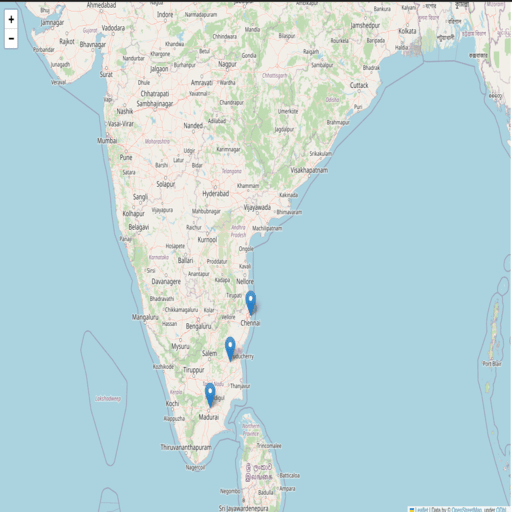

### Find the distances between the two points

We'll use `geopy` to find the geodesic distances between the points.

In [14]:
from geopy.distance import distance

km = distance(location, location2)
miles = distance(location, location2).miles

print("Distance between postcodes:")
print(f"{km}")
print(f"{miles} miles")

Distance between postcodes:

410.2628545230755 km

254.9255190456953 miles


### Folium bonus - Lines between points.

A small but useful feature of Folium is the ability to draw lines between points, using `folium.PolyLine()`. This is shown below, where we connect a line between the two locations.

In [19]:
import folium

# create a Folium map centred at the above location
m = folium.Map(location=midpoint, zoom_start=4, width=1200, height=800)

# add marker at the locations
folium.Marker(location, popup=km).add_to(m)
folium.Marker(location2, popup=km).add_to(m)

# add line between points
folium.PolyLine((location,location2)).add_to(m)

m

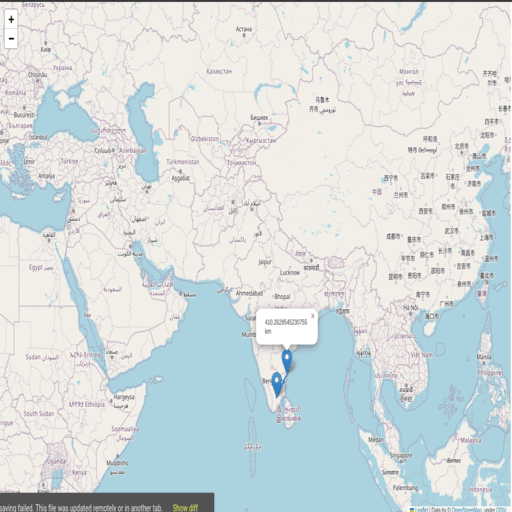

## Credit:https://github.com/bugbytes-io

## **⭐️⭐️Thanks for visiting guys⭐️⭐️**